### Ice Shapes
S4.4 of Gerakines & Hudson 2020 (https://iopscience.iop.org/article/10.3847/1538-4357/abad39) gives "IR absorption coefficient α(ν̃) (in cm−1)":
$$\alpha(\tilde{\nu}) = 4 \pi \tilde{\nu} k(\tilde{\nu})$$
and the band strength A (in cm molecule−1):
$$A = \frac{1}{\rho_N} \int_{band} \alpha(\tilde{\nu})d \tilde{\nu}$$

where $\rho_N$ is the number density of the absorbers (in molecules cm$^{-3}$) 

$\alpha(\tilde{\nu})$ is the IR absorption coefficient in cm$^{-1}$.

$A$ is the band strength in cm/molecule.  It may also be the 'absorbance' as defined by LIDA.

Hudgins 1993 (https://ui.adsabs.harvard.edu/abs/1993ApJS...86..713H/abstract) eqn 8 is:
$$A = \frac{1}{N}\int \tau d\nu$$
where $N$ is the number density of molecules (molecules per area).  They define $\tau = \ln \frac{I_0}{I}$.

Some algebra to get $\tau$, the observable, from the data:

$$A N = \int \tau_\nu d\nu$$

$$\frac{d}{d\nu} A N = \frac{d}{d\nu}\int \tau_\nu d\nu$$

$$N \frac{d}{d\nu} A = \tau_\nu $$

$$N \frac{\alpha_\nu}{\rho_N} = \tau_\nu $$

$$\tau_\nu = N \frac{\alpha_\nu}{\rho_N} = N \frac{4 \pi \tilde{\nu} k}{\rho_N}$$

# Rocha derivation
(added 2025-08-21, after the "How are A and k related?" section below)

Absorbance $A_\lambda = 0.434 \alpha_\lambda r \ell$, where 

* "$r$ is the concentration in the sample" and I interpret that as the number fraction of the species of interest
* $\alpha_\lambda$ is the wavelength-dependent absorption coefficient
* ℓ is the effective radiation path within the ice

This gives a relation:

$$ \alpha_\lambda = \frac{A_\lambda}{0.434 r \ell}$$

In [1]:
1/0.434

2.3041474654377883

In [2]:
import numpy as np
np.log(10)

2.302585092994046

This would imply

$$k = \frac{A_\lambda \ln(10)}{4 \pi \tilde{\nu} r \ell } = \frac{A_\lambda}{5.46 \tilde{\nu} r \ell}$$

In [3]:
4*np.pi/np.log(10)

5.457505415367365

### How are A and k related?

$$ \frac{dA}{d\nu} = \frac{\alpha_\nu}{\rho_N} = \frac{4 \pi \tilde{\nu} k}{\rho_N}$$

implies

$$\alpha_\nu = 4 \pi \tilde{\nu} k$$

is that right?

[Chatgpt claims](https://chatgpt.com/c/689223d7-29b8-8004-a20d-48b1108dfe1b):
$$k=\frac{A \lambda \ln 10}{4πd}$$
where $d$ is the thickness of the slab, $\lambda$ is the wavelength.  Since A, $\lambda$, and $d$ all have units of cm, this would give k with units of cm, which is not correct.

We have $d = \frac{N}{\rho_N}$, which gives the equivalency they use: $\alpha_\nu d = \tau$

The $\ln 10$ comes from nowhere.

So I think this is really:
$$A = \alpha_\nu / \rho_N = 4 \pi \tilde{\nu} k / \rho_N$$
inverting to
$$k = \frac{A \rho_N}{4 \pi \tilde{\nu}}$$ 
but this doesn't work out unitwise

I'll adopt
$$k = \frac{A N}{4 \pi \tilde{\nu}}$$ 
which does work out.  

$k$ is unitless, $[A]$ = cm, $[\rho_N]$ = cm$^{-3}$, $[\tilde{\nu}]$ = cm$^{-1}$.

### Compare to Gerakines

Verifying that the integral of opacity equals A

A in Table 3 is about $1\times10^{-17}$ cm/molecule

In [4]:
import numpy as np
from astropy import units as u
from icemodels.core import retrieve_gerakines_co, absorbed_spectrum, load_molecule_univap
gerakines_tbl = retrieve_gerakines_co()
A_CO_Gerakines = 1e-17*u.cm

In [5]:
xarr = np.linspace(4.6, 4.75, 1000)*u.um
ice_column = 1 * u.cm**-2
opacity = absorbed_spectrum(ice_column=ice_column, ice_model_table=gerakines_tbl, return_tau=True, xarr=xarr)

In [6]:
dnu = np.abs(xarr.to(u.cm**-1, u.spectral()).diff())
A_CO_Gerakines_inferred = (opacity[:-1]*dnu / ice_column).sum().to(u.cm)
A_CO_Gerakines_inferred, A_CO_Gerakines, A_CO_Gerakines_inferred/A_CO_Gerakines

(<Quantity 1.42014076e-17 cm>, <Quantity 1.e-17 cm>, <Quantity 1.42014076>)

## Try it again for non-pure

In [7]:
import icemodels
from icemodels.core import read_lida_file, read_ocdb_file, optical_constants_cache_dir
# can't use these data: do not define their sample thickness
# coco2 = read_lida_file(f'{optical_constants_cache_dir}/60_CO:CO2_1:1_25.0K.txt')

cotb = icemodels.core.retrieve_gerakines_co() 
opacity_CO = absorbed_spectrum(ice_column=ice_column, ice_model_table=cotb, return_tau=True, xarr=xarr)
# A_CO_coco2 = (opacity_CO[:-1]*dnu / ice_column).sum().to(u.cm)
# A_CO_coco2_pos = (opacity_CO[:-1]*dnu / ice_column)[opacity_CO[:-1] > 0].sum().to(u.cm)
# A_CO_coco2, A_CO_coco2/A_CO_Gerakines, A_CO_coco2_pos, A_CO_coco2_pos/A_CO_Gerakines

In [8]:
h2oco = read_lida_file(f'{optical_constants_cache_dir}/142_H2O:CO_(100:14)_10.0K.txt')
lida_co = read_lida_file(f'{optical_constants_cache_dir}/75_CO_1_15.0K.txt')
opacity_h2oco = absorbed_spectrum(ice_column=ice_column, ice_model_table=h2oco, return_tau=True, xarr=xarr)
A_CO_h2oco = (opacity_h2oco[:-1]*dnu / ice_column).sum().to(u.cm)
A_CO_h2oco, A_CO_h2oco/A_CO_Gerakines, A_CO_h2oco/A_CO_Gerakines * 100/14. 

(<Quantity 3.04475462e-19 cm>, <Quantity 0.03044755>, <Quantity 0.21748247>)

In [9]:
h2oco_Elsila = read_ocdb_file(f'{optical_constants_cache_dir}/39_H2O:CO_(20:1)_12K_Elsila.txt')
opacity_h2oco_Elsila = absorbed_spectrum(ice_column=ice_column, ice_model_table=h2oco_Elsila, return_tau=True, xarr=xarr)
A_CO_h2oco_Elsila = (opacity_h2oco_Elsila[:-1]*dnu / ice_column).sum().to(u.cm)
A_CO_h2oco_Elsila, A_CO_h2oco_Elsila/A_CO_Gerakines, A_CO_h2oco_Elsila/A_CO_Gerakines * 20.

(<Quantity 2.99709056e-18 cm>, <Quantity 0.29970906>, <Quantity 5.99418113>)

In [11]:
import pylab as pl

Oh my god this is so damned confusing


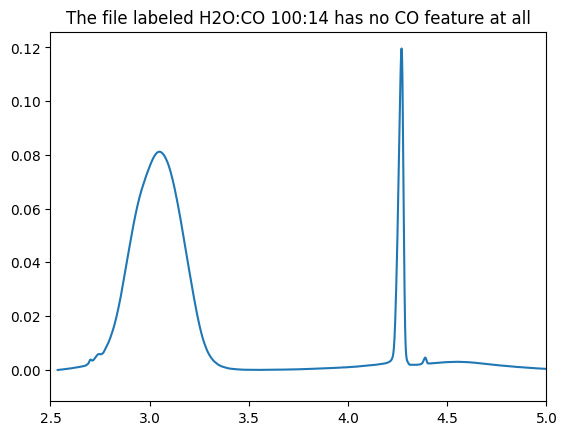

In [12]:
#pl.plot(xarr, opacity_h2oco * 114/14., label='H2O:CO 100:14 [Ehrenfreund] * 114/14')
pl.plot(h2oco['Wavelength'], h2oco['k'])
pl.xlim(2.5,5);
pl.title("The file labeled H2O:CO 100:14 has no CO feature at all");
print("Oh my god this is so damned confusing")

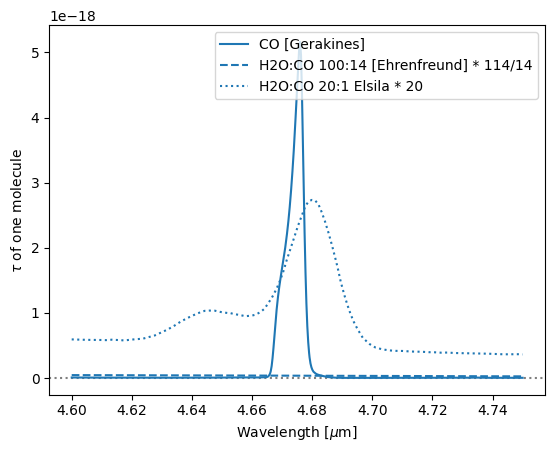

In [13]:
pl.plot(xarr, opacity_CO, label='CO [Gerakines]')
pl.plot(xarr, opacity_h2oco * 114/14., label='H2O:CO 100:14 [Ehrenfreund] * 114/14')
pl.plot(xarr, opacity_h2oco_Elsila * 20, label='H2O:CO 20:1 Elsila * 20')
pl.axhline(0, color='k', linestyle=':', alpha=0.5, zorder=-5)
pl.legend(loc='upper right')
pl.xlabel("Wavelength [$\\mu$m]");
pl.ylabel("$\\tau$ of one molecule");

## Conclusion?

We always get the right order-of-magnitude, but the A-values are pretty different.  For CO$_2$, that's expected because the shape of the line profile actually changes (see Ehrenfreund).  For H$_2$O, ... nothing makes sense.

CO2 also has the particularly bad problem that it is mostly negative(!)

# 2025-08-21: Try to get LIDA right


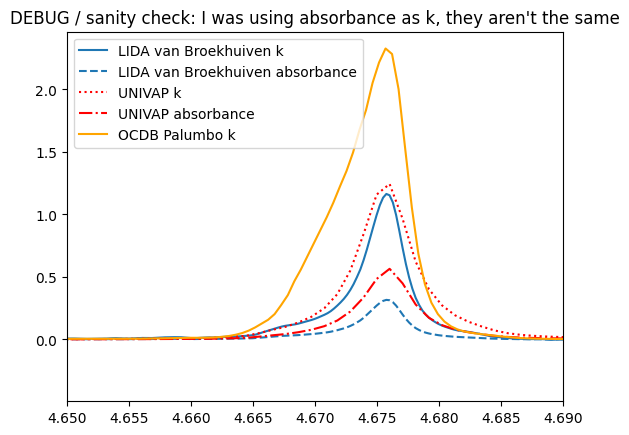

In [14]:
univapco = load_molecule_univap('CO')
palu = read_ocdb_file(f'{optical_constants_cache_dir}/267_CO_(1)_15K_Palumbo.txt')
#fras = read_lida_file(f'{optical_constants_cache_dir}/61_CO_1_15.0K.txt')
broek = read_lida_file(f'{optical_constants_cache_dir}/75_CO_1_15.0K.txt')
#pl.plot(fras['Wavelength'], fras['k'])
pl.plot(broek['Wavelength'], broek['k'], label='LIDA van Broekhuiven k')
pl.plot(broek['Wavelength'], broek['absorbance'], label='LIDA van Broekhuiven absorbance')
pl.plot(univapco['Wavelength'], univapco['k'], label='UNIVAP k', color='r')
pl.plot(univapco['Wavelength'], univapco['absorbance'], label='UNIVAP absorbance', color='r')
pl.plot(palu['Wavelength'], palu['k'], color='orange', label='OCDB Palumbo k')
pl.legend(loc='best')
pl.xlim(4.65, 4.69);
pl.title("DEBUG / sanity check: I was using absorbance as k, they aren't the same");

In [15]:
broek.meta['ice_layer_depth']

<Quantity 0.23247547 um>

In [16]:
from icemodels.core import composition_to_molweight
tb = broek
density = (tb.meta['density'])
molwt = composition_to_molweight(tb.meta['composition'])
monolayer = 1e15 / u.cm**2
ice_thickness = float(tb.meta['ice_thickness'].replace('ML', '')) * monolayer
ice_depth = (ice_thickness / density * molwt).to(u.um)
tb.meta['ice_layer_depth'] = ice_depth.to(u.um)
kay = (tb['absorbance'] * np.log(10) / (4 * np.pi * ice_depth * tb['Wavenumber'].quantity)).decompose()

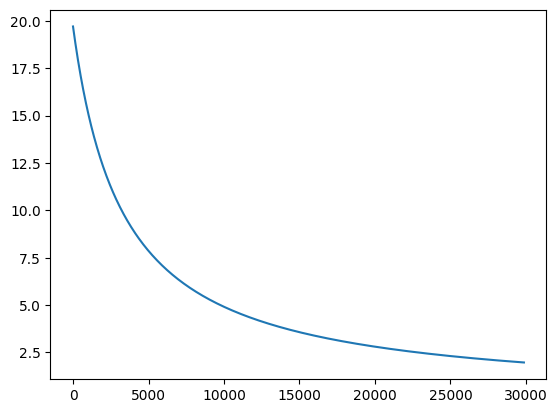

In [17]:
pl.plot(kay / tb['absorbance'])

In [18]:
broek

Wavenumber,absorbance,Wavelength,k
1 / cm,,um,
float64,float64,float64,float64
399.987,0.00505935,25.000812526407106,0.09958402754504943
400.108,-0.00900755,24.993251822008055,-0.17724348693099098
400.228,-0.0148848,24.98575811787281,-0.29280357422330383
400.349,-0.00377085,24.97820651481582,-0.07415515513906779
400.469,0.0133511,24.970721828655897,0.26247562850628725
400.59,0.0173092,24.96317931051699,0.3401870139569886
400.711,0.00451623,24.955641347504812,0.08873309413048915
400.831,-0.0107099,24.948170176458408,-0.21036086716559768
